In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

# import image and label

In [2]:
nSign = 9
img = cv2.imread("DTUSignPhotos/DTUSigns{0:03d}.jpg".format(nSign))
lm = np.loadtxt("DTUSignPhotos/DTUSigns{0:03d}.txt".format(nSign))

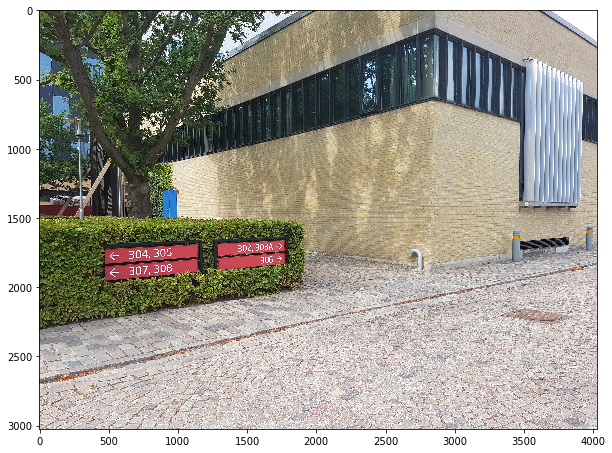

In [3]:
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.figure(figsize = (10,10))
plt.imshow(img)

(3024, 4032)


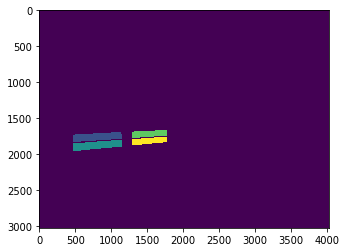

In [4]:
h,w,d = img.shape
label = np.zeros(shape = (h,w),dtype='int8')
nSquares = len(lm)//4
for n in range(nSquares):
    idx = n*4
    cv2.fillConvexPoly(label, np.array(lm[idx:idx+4], 'int32'), n+1)
print(label.shape) 
plt.imshow(label)

# pixel classification

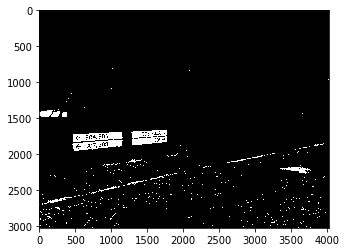

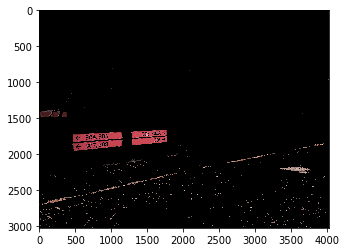

In [22]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_hsv = np.array([0, 43, 46])
upper_hsv = np.array([10, 255, 255])
mask1 = cv2.inRange(img_hsv, lowerb=lower_hsv, upperb=upper_hsv)

lower_hsv = np.array([170, 43, 46])
upper_hsv = np.array([180, 255, 255])
mask2 = cv2.inRange(img_hsv, lowerb=lower_hsv, upperb=upper_hsv)

mask = mask1+mask2
img_with_mask = cv2.bitwise_and(img,img, mask= mask)
plt.imshow(mask, cmap='gray')
plt.figure()
plt.imshow(img_with_mask)

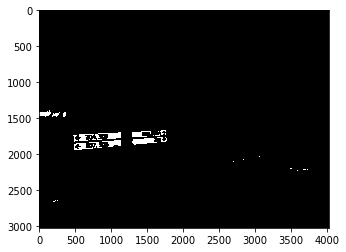

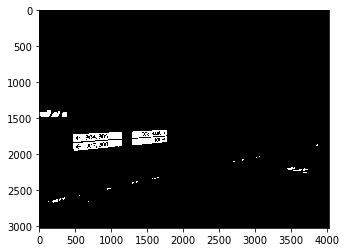

In [25]:
kernel = np.ones((5,5),np.uint8)
mask_erode =cv2.erode(mask, kernel, iterations = 3)
mask_dilate =cv2.dilate(mask_erode, kernel, iterations = 3)

plt.imshow(mask_erode, cmap='gray')
plt.figure()
plt.imshow(mask_dilate, cmap='gray')

# BLOB analysis

## method 1 

In [27]:
cnts=cv2.findContours(mask_dilate.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))

60


1


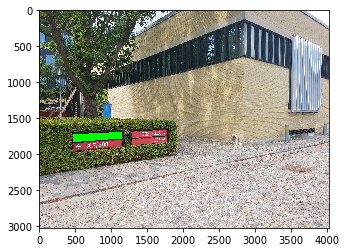

In [28]:
# filter by area and shape
sign = []
output = img
for cnt in cnts:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    area = cv2.contourArea(cnt)
    if area > 1000 and len(approx)==4:
        sign.append(cnt)
        output = cv2.drawContours(img.copy(),[cnt],0,(0,255,0),-1)
        
print(len(sign))
plt.imshow(output,cmap='gray')

## method 2

In [ ]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Area.
params.filterByArea = True
params.minArea = 2000

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01


In [ ]:
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
thresh=cv2.bitwise_not(thresh)
keypoints = detector.detect(thresh)
thresh=cv2.bitwise_not(thresh)
print(len(keypoints))

In [ ]:

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2.imshow('keypoint',im_with_keypoints)